In [2]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import transforms, datasets

In [3]:
if torch.cuda.is_available():
    DEVICE = torch.device('cuda')
else:
    DEVICE = torch.device('cpu')

print("Using PyTorch version:", torch.__version__,' Device:', DEVICE)

BATCH_SIZE = 50
EPOCHS = 15
LEARNING_RATE = 0.0001

Using PyTorch version: 2.7.1+cpu  Device: cpu


In [4]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                              train = False,
                              transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                          batch_size = BATCH_SIZE,
                                          shuffle = False)

100.0%
100.0%
100.0%
100.0%


In [5]:
for (X_train, y_train) in train_loader:
    print('X_train:', X_train.size(), 'type:', X_train.type())
    print('y_train:', y_train.size(), 'type:', y_train.type())
    break

X_train: torch.Size([50, 1, 28, 28]) type: torch.FloatTensor
y_train: torch.Size([50]) type: torch.LongTensor


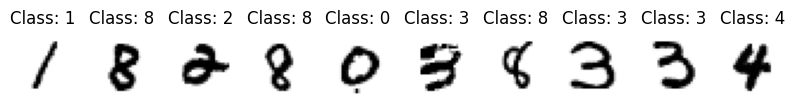

In [6]:
pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))

for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.axis('off')
    plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap = "gray_r")
    plt.title('Class: ' + str(y_train[i].item()))

In [7]:
class CNN(nn.Module): # 완전연결 신경망 모델
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1,32,3,1)
        self.conv2 = nn.Conv2d(32,64,3,1)
        self.dropout = nn.Dropout2d(0.25)
        self.fc1 = nn.Linear(1600,1000)
        self.fc2 = nn.Linear(1000,10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x,2)
        x = self.dropout(x)
        x = torch.flatten(x,1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [8]:
model = CNN().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr = LEARNING_RATE)
criterison = nn.CrossEntropyLoss()

In [9]:
model.train()
i = 1
for epoch in range(EPOCHS):
    for data, target in train_loader:
        data = data.to(DEVICE)
        target = target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = criterison(output, target)
        loss.backward()
        optimizer.step()
        if i % 1000 == 0:
            print('train step: {}\t loss: {:.3f}'.format(i, loss.item()))

        i += 1

train step: 1000	 loss: 0.152
train step: 2000	 loss: 0.159
train step: 3000	 loss: 0.029
train step: 4000	 loss: 0.030
train step: 5000	 loss: 0.061
train step: 6000	 loss: 0.020
train step: 7000	 loss: 0.014
train step: 8000	 loss: 0.009
train step: 9000	 loss: 0.017
train step: 10000	 loss: 0.063
train step: 11000	 loss: 0.009
train step: 12000	 loss: 0.013
train step: 13000	 loss: 0.004
train step: 14000	 loss: 0.000
train step: 15000	 loss: 0.024
train step: 16000	 loss: 0.004
train step: 17000	 loss: 0.022
train step: 18000	 loss: 0.004


In [11]:
model.eval
test_loss=0
correct=0

with torch.no_grad():
  for data,target in test_loader:
    data,target=data.to(DEVICE),target.to(DEVICE)
    output=model(data)
    test_loss+=criterison(output,target).item()
    pred=output.argmax(dim=1,keepdim=True)
    correct+=pred.eq(target.view_as(pred)).sum().item()
    
test_loss/=len(test_loader.dataset)
accuracy=100.*correct/len(test_loader.dataset)

print(f'Test Average Loss:{test_loss:.4f}, Accuracy:{correct}/{len(test_loader.dataset)}({accuracy:.2f}%)')

Test Average Loss:0.0006, Accuracy:9906/10000(99.06%)
